In [7]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib
import matplotlib.pyplot as plt
from Simple_convnet import SimpleConvNet
from Trainer_CNN import Trainer

matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False

In [2]:
train = pd.read_csv('../../BP神经网络/手工实现/mnist_train_6000.csv', header=None).values  # 训练数据集
x_train = train[:, 1:].reshape(6000, 1, 28, 28)  # 转换为(number,channel, height, width)的格式
test = pd.read_csv('../../BP神经网络/手工实现/mnist_test_1000.csv', header=None).values  # 测试数据集
x_test = test[:, 1:].reshape(1000, 1, 28, 28)
print(x_train.shape)
print(x_test.shape)

(6000, 1, 28, 28)
(1000, 1, 28, 28)


In [3]:
enc = preprocessing.OneHotEncoder()  # 独热编码
enc.fit(train[:, 0].reshape(-1, 1))
t_train = enc.transform(train[:, 0].reshape(-1, 1)).toarray()
t_test = enc.transform(test[:, 0].reshape(-1, 1)).toarray()

In [4]:
max_epochs = 10
network = SimpleConvNet(input_dim=(1, 28, 28),
                        conv_param={'filter_num': 30, 'filter_size': 5, 'pad': 0, 'stride': 1},
                        hidden_size=100, output_size=10, weight_init_std=0.01)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=max_epochs, mini_batch_size=100, optimizer_param={'lr': 0.001})
trainer.train()

current_iter:0 , train loss:2.29462344776736
======current_iter:0, train acc:0.15133333333333332, test acc:0.14=======
current_iter:1 , train loss:2.230637153709654
current_iter:2 , train loss:2.2275162591212223
current_iter:3 , train loss:2.179813766351019
current_iter:4 , train loss:2.1544181053584053
current_iter:5 , train loss:2.1258013620501885
current_iter:6 , train loss:2.0888722063916894
current_iter:7 , train loss:2.0651194606119843
current_iter:8 , train loss:1.9615337462622646
current_iter:9 , train loss:1.9764515510805516
current_iter:10 , train loss:1.935231768405766
current_iter:11 , train loss:1.8980747048853712
current_iter:12 , train loss:1.7652577876832796
current_iter:13 , train loss:1.7412861482567195
current_iter:14 , train loss:1.6662608491142286
current_iter:15 , train loss:1.538729165331978
current_iter:16 , train loss:1.5451438658033099
current_iter:17 , train loss:1.472678051998517
current_iter:18 , train loss:1.422188495172025
current_iter:19 , train loss:1.3

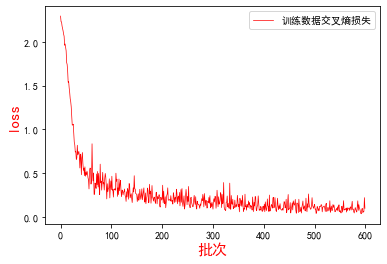

In [19]:
train_loss = np.array(trainer.train_loss_list)

plt.plot(train_loss, lw=0.7, color='r', label='训练数据交叉熵损失')
plt.xlabel('批次', fontsize=15, color='r')
plt.ylabel('loss', fontsize=15, color='r')
plt.legend()
plt.show()

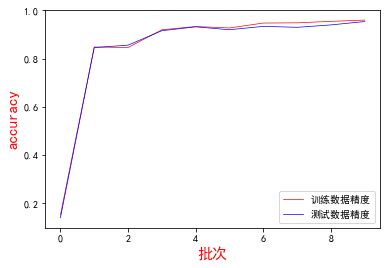

In [23]:
train_acc = np.array(trainer.train_acc_list)
test_acc = np.array(trainer.test_acc_list)

plt.plot(train_acc, lw=0.7, color='red', label='训练数据精度')
plt.plot(test_acc, lw=0.7, color='b', label='测试数据精度')
plt.xlabel('批次', fontsize=15, color='r')
plt.ylabel('accuracy', fontsize=15, color='r')
plt.legend()
plt.show()